# Introduction

In many parts of the world, individuals become paralyzed due to various reasons, particularly spinal cord injuries, leaving them unable to move their limbs. Machine learning models developed using EEG datasets have the potential to help these patients communicate with the outside world through Brain-Computer Interfaces (BCIs) and even control mechanical limbs. This project focuses on analyzing brain waves using EEG (Electroencephalography) data and performing classification based on these signals. EEG is a technique that measures the brain's electrical activity and is commonly employed in the analysis of neurological and psychological conditions. In this study, I utilized data obtained from the EMOTIV Insight + 5 Channel EEG device to examine the frequency bands of different brain regions, specifically focusing on power values associated with components such as alpha, beta, theta, and gamma waves.

In this project, I tested the classification of different hand movements using EEG data and achieved **98% accuracy** using the **KNN model** on the test dataset. As more advanced models are developed and more complex movements are classified, the possibility of creating a fully controlled BCI becomes increasingly achievable.

## Dataset
The dataset consists of data obtained from the EMOTIV Insight + 5 Channel EEG device. This device has a sampling frequency of 128 Hz and uses a 16-bit analog-to-digital converter to measure brain waves. The EEG device records signals from the following brain regions:
AF3, AF4, T7, T8, Pz.
The dataset includes brainwave data associated with visual stimuli representing different motor actions. During the data collection process, visual stimuli were shown to the participant, representing motor actions, while the EEG device recorded the brain waves related to these stimuli. In the situation where the participant's eyes are closed, they were given an auditory signal at specific times to open their eyes and view the images.

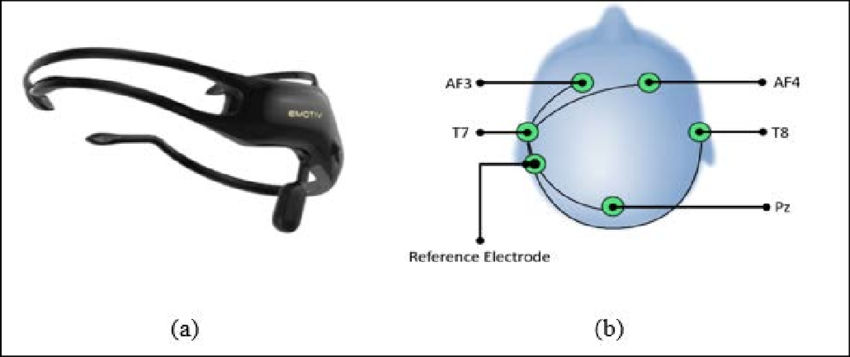

## Data Collection Protocol
The data collection was performed under a 36-minute protocol consisting of different cycles. In each cycle, the participant was shown a visual stimulus: an arrow to the right (representing a movement to the right), an arrow to the left (representing a movement to the left), and a circle (representing no motor action). The purpose of this protocol was to measure the brain's response to motor movements and to make this data generalizable for machine learning models.

## Pre-Processing
The collected data was pre-processed for later use in machine learning. To better understand the pre-processing steps, the data source, format, and characteristics are explained below.

After transforming the collected data into the frequency domain, the weighted and arithmetic mean of each wave was calculated, and the resulting matrix was created with the dimensions of 5x5. This matrix represents the power of different frequency bands in each brain region.

## Objective and Method
The goal of this project is to classify brain activities using EEG data. For this purpose, classification will be performed based on the power of the frequency bands from each brain region, and the best model will be selected by evaluating the accuracy of this classification. The following steps will be taken:

Data Pre-processing: The raw EEG data will be transformed into the frequency domain, followed by normalization and cleaning.

Modeling: Different classifiers (e.g., KNN, Random Forest, Logistic Regression, etc.) will be used to create models, and hyperparameter optimization will be conducted.

Model Evaluation: Model performance will be evaluated using accuracy and other metrics.

***

*This machine learning model was developed using the dataset titled "Brain wave data from hands movement of EEG" available on the Kaggle platform.* 

*The model was created by* **Çağatay Elik**.

You can access the dataset here:

__[Brain wave data from hands movement of EEG](https://www.kaggle.com/datasets/fabriciotorquato/brain-wave-data-from-hands-movement-of-eeg?resource=download)__

### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### 2. Merging EEG Data from Five Distinct Participants

In [3]:
csv_files = ["user_a.csv", "user_b.csv", "user_c.csv", "user_d.csv", "user_e.csv"]

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)  
    dataframes.append(df)  

merged_df = pd.concat(dataframes, ignore_index=True)  

merged_df.to_csv("merged_data.csv", index=False)

print("All CSV files were merged row by row and saved as 'merged_data.csv!")

All CSV files were merged row by row and saved as 'merged_data.csv!


### 3. Describing the Data

In [15]:
df.head(10)

,Values,POW.AF3.Theta,POW.AF3.Alpha,POW.AF3.BetaL,POW.AF3.BetaH,POW.AF3.Gamma,POW.T7.Theta,POW.T7.Alpha,POW.T7.BetaL,POW.T7.BetaH,...,POW.T8.Theta,POW.T8.Alpha,POW.T8.BetaL,POW.T8.BetaH,POW.T8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
0,0.0,15.037535,3.264751,5.527606,2.220069,0.449631,5.655799,1.696389,1.299318,0.747850,...,5.361616,1.550942,3.416099,1.674853,0.837529,6.559098,2.302451,4.412226,1.891558,0.426737
1,0.0,17.101770,3.846838,4.904165,1.932901,0.474929,5.518888,1.997308,1.001001,0.618174,...,4.966994,1.826463,3.282468,1.672080,0.848876,7.169908,2.637954,3.878741,1.656820,0.479183
2,0.0,18.193260,4.140787,3.990228,1.611893,0.492856,5.011922,2.435185,0.778720,0.506470,...,4.177390,2.200174,2.906585,1.576778,0.837001,7.695051,2.820429,3.104351,1.416830,0.525704
3,0.0,18.374077,4.113279,3.085334,1.342652,0.507474,4.280084,3.045417,0.729953,0.432153,...,3.456944,2.621692,2.433471,1.410742,0.808211,8.301782,2.857247,2.331822,1.220999,0.565839
4,0.0,17.418758,3.795747,2.436049,1.184313,0.529211,3.601191,3.742631,0.872300,0.401724,...,2.997058,2.975028,2.052718,1.231275,0.786265,8.583909,2.775260,1.772168,1.110581,0.609801
5,0.0,15.961003,3.312330,2.165254,1.152628,0.576093,3.231369,4.350519,1.181469,0.408951,...,3.081900,3.124046,1.928420,1.104634,0.793011,8.767477,2.623060,1.547943,1.105106,0.675415
6,0.0,13.493847,2.790294,2.246443,1.235976,0.661933,3.133281,4.673391,1.614457,0.453968,...,3.328734,2.973523,2.149309,1.083774,0.835113,8.222730,2.429293,1.671861,1.214258,0.774469
7,0.0,10.827897,2.344524,2.567231,1.402994,0.785139,3.372255,4.601820,2.099972,0.547973,...,3.639758,2.549129,2.700610,1.216743,0.903296,7.410793,2.233520,2.076813,1.426199,0.901071
8,0.0,7.782803,2.046252,2.997248,1.607601,0.926304,3.900950,4.172768,2.559423,0.702211,...,3.665119,1.973873,3.463463,1.527780,0.981318,6.349954,2.059249,2.657116,1.698373,1.032182
9,0.0,5.359881,1.918968,3.401279,1.809564,1.057690,4.961617,3.555354,2.946026,0.913536,...,3.467005,1.415493,4.215637,1.984766,1.055077,5.779040,1.930795,3.272768,1.971301,1.141008


In [16]:
df = pd.read_csv("merged_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85485 entries, 0 to 85484
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Values         85485 non-null  float64
 1   POW.AF3.Theta  85485 non-null  float64
 2   POW.AF3.Alpha  85485 non-null  float64
 3   POW.AF3.BetaL  85485 non-null  float64
 4   POW.AF3.BetaH  85485 non-null  float64
 5   POW.AF3.Gamma  85485 non-null  float64
 6   POW.T7.Theta   85485 non-null  float64
 7   POW.T7.Alpha   85485 non-null  float64
 8   POW.T7.BetaL   85485 non-null  float64
 9   POW.T7.BetaH   85485 non-null  float64
 10  POW.T7.Gamma   85485 non-null  float64
 11  POW.Pz.Theta   85485 non-null  float64
 12  POW.Pz.Alpha   85485 non-null  float64
 13  POW.Pz.BetaL   85485 non-null  float64
 14  POW.Pz.BetaH   85485 non-null  float64
 15  POW.Pz.Gamma   85485 non-null  float64
 16  POW.T8.Theta   85485 non-null  float64
 17  POW.T8.Alpha   85485 non-null  float64
 18  POW.T8

Sample count, presence of spaces between words, and non-English characters and data types checked, no strings found. Also, no missing data was found.

In [17]:
df.describe()

,Values,POW.AF3.Theta,POW.AF3.Alpha,POW.AF3.BetaL,POW.AF3.BetaH,POW.AF3.Gamma,POW.T7.Theta,POW.T7.Alpha,POW.T7.BetaL,POW.T7.BetaH,...,POW.T8.Theta,POW.T8.Alpha,POW.T8.BetaL,POW.T8.BetaH,POW.T8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
count,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,...,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000,85485.000000
mean,0.958706,70.373809,62.633761,39.471148,38.746316,29.813779,61.554374,54.132515,34.538129,32.305536,...,20.184259,14.416027,6.454672,7.631805,5.716433,66.134423,62.864763,39.110342,39.236932,30.728453
std,0.801435,282.403045,161.102618,105.785638,92.966331,73.303374,324.536863,171.184032,99.810551,80.147890,...,292.637743,78.737890,41.659065,24.533889,17.773010,294.595860,160.257685,104.326275,94.559249,76.507968
min,0.000000,0.193475,0.204714,0.072630,0.199235,0.074464,0.065850,0.066191,0.063859,0.094501,...,0.000003,0.000000,0.000000,0.000000,0.000005,0.271252,0.267575,0.115252,0.156867,0.088958
25%,0.000000,3.528877,2.198501,1.113346,0.828828,0.326574,0.696758,0.577586,0.439642,0.401266,...,1.916972,1.738453,1.056476,0.816844,0.328133,3.450795,2.243001,1.115284,0.844277,0.299594
50%,1.000000,7.991018,4.807033,1.725268,1.231472,0.548427,1.427271,0.988115,0.790446,0.735610,...,3.003749,2.958051,1.767613,1.363870,0.672816,6.805331,4.519885,1.706015,1.218517,0.500767
75%,2.000000,71.730446,26.787399,3.473631,2.259694,1.289276,8.697760,4.287541,2.813533,4.160122,...,5.745389,7.850247,4.130129,7.339178,6.218989,48.884743,29.099911,3.288557,2.335153,1.189339
max,2.000000,17666.017578,6095.287109,2427.682617,1587.710571,1065.477295,13075.584961,7881.771484,2688.726563,1809.549316,...,26345.796875,5625.630371,3863.484131,997.893860,850.612610,16924.259766,5982.326660,2243.265625,1437.919922,1222.559082


The data shows significant variability, with high standard deviations indicating dynamic brain activity. Theta and Alpha bands generally have higher mean values, suggesting involvement in cognitive and attentional processes. The wide range in power values, especially in Beta and Gamma bands, may indicate different mental states or external influences. Further analysis and visualization could help interpret these patterns more effectively.

### 4. Plotting Correlation Heatmap

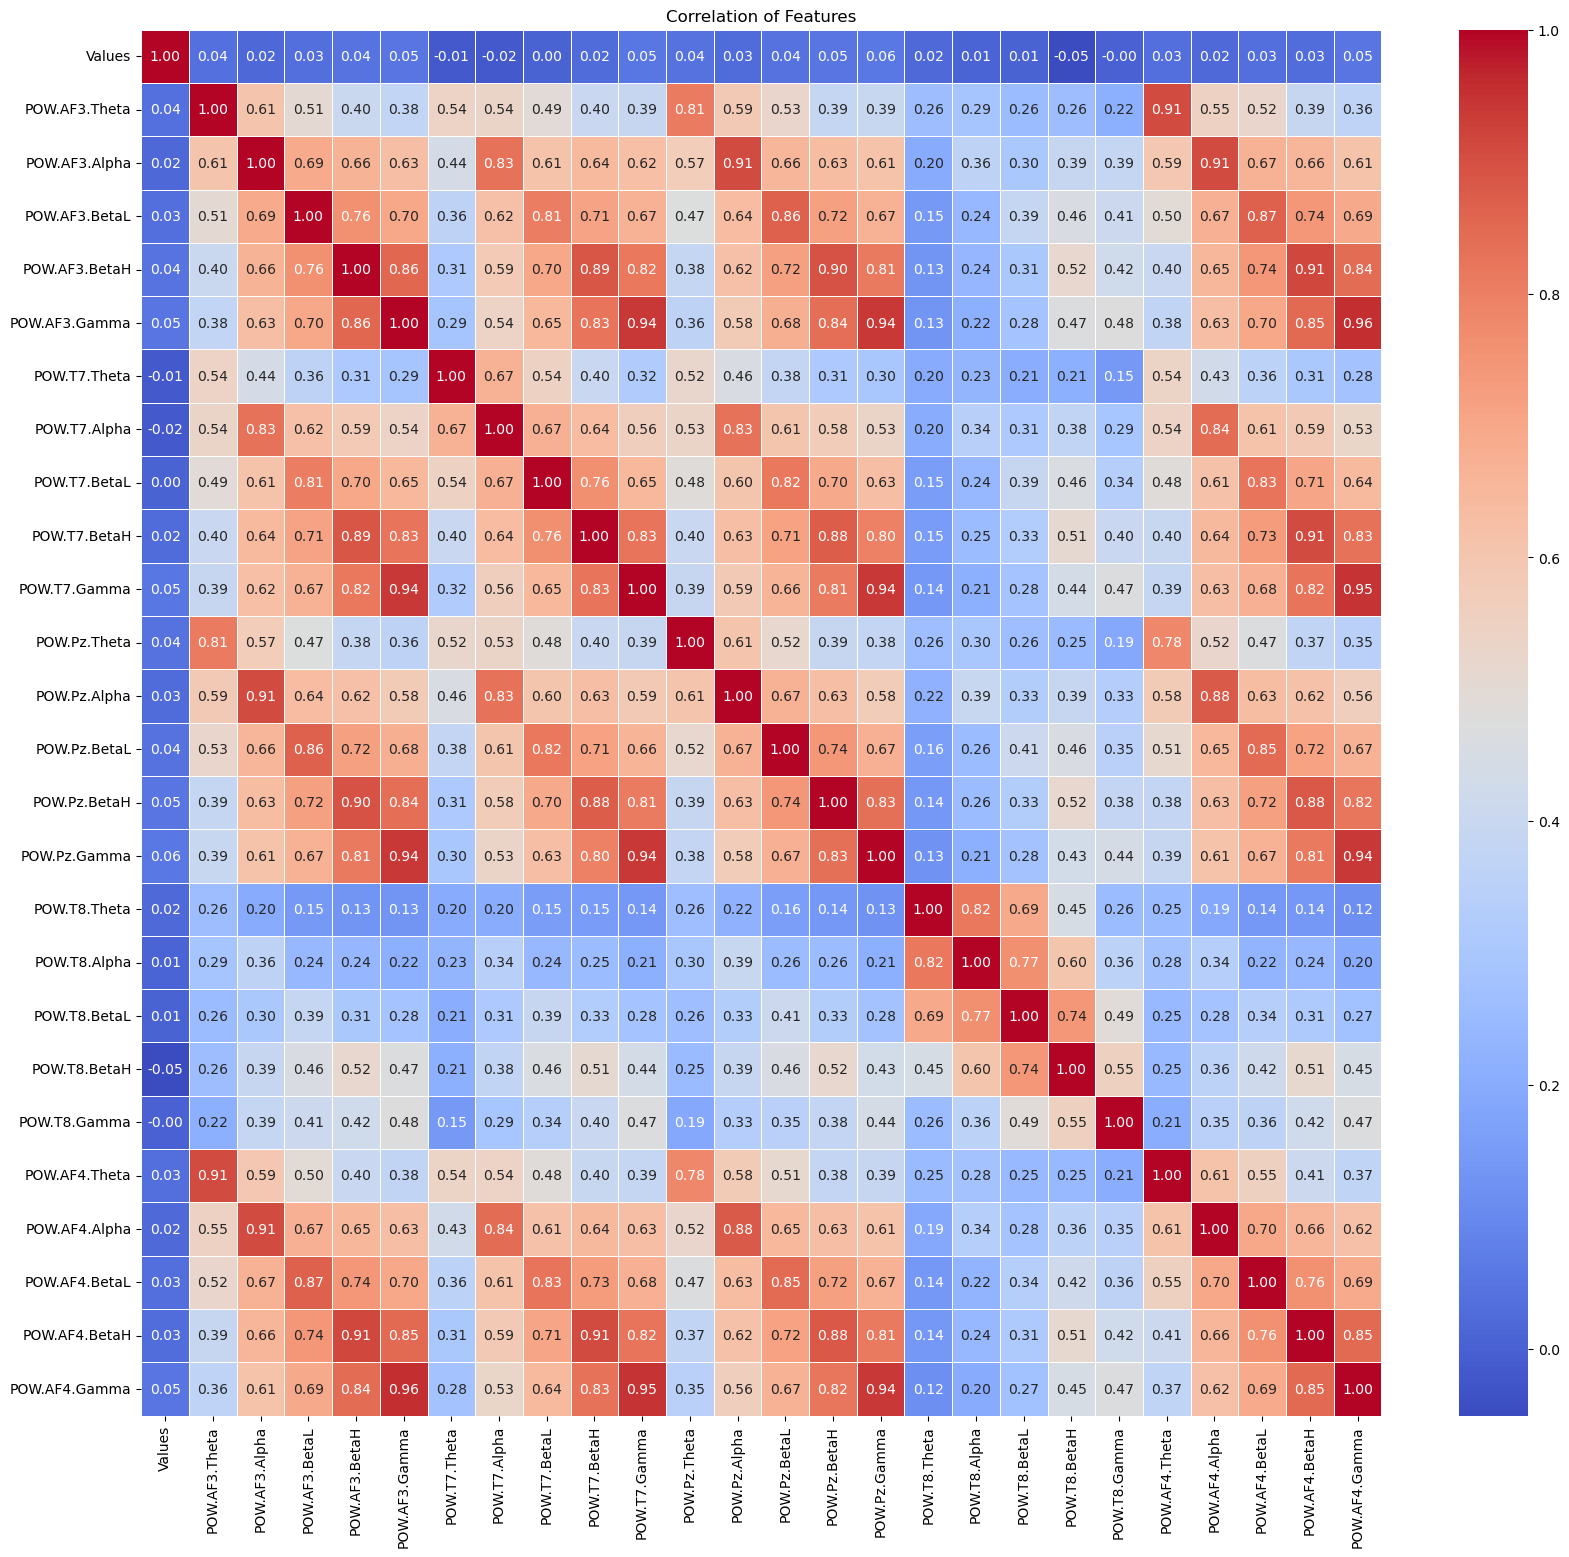

In [18]:
def plot_correlation_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation of Features")
    plt.savefig("correlationoffeatures.png")
    plt.show()    

plot_correlation_heatmap(df)

There are some high correlations seen between different brain regions, such as AF4 Gamma and AF3 Gamma, or T7 Alpha and AF4 Alpha.

### 5. Outlier Detection (IQR Method)

In [4]:
def detect_outliers_iqr(df):
    outlier_indices = []
    outliers_df = pd.DataFrame()
    
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers_in_col.index)
        outliers_df = pd.concat([outliers_df, outliers_in_col], axis=0)
        
    outlier_indices = list(set(outlier_indices))
    outliers_df = outliers_df.drop_duplicates()
    return outliers_df, outlier_indices

outliers_df, outlier_indices = detect_outliers_iqr(df)
df_cleaned = df.drop(outlier_indices).reset_index(drop=True)
print(df_cleaned)

      Values  POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  \
0        0.0      18.374077       4.113279       3.085334       1.342652   
1        0.0      17.418758       3.795747       2.436049       1.184313   
2        0.0      15.961003       3.312330       2.165254       1.152628   
3        0.0      13.493847       2.790294       2.246443       1.235976   
4        0.0      10.827897       2.344524       2.567231       1.402994   
...      ...            ...            ...            ...            ...   
7789     2.0       1.006217       1.851091       1.102220       2.406652   
7790     2.0       1.053759       1.881660       1.214891       2.192319   
7791     2.0       2.511556       2.146428       1.442680       2.108327   
7792     2.0       7.385882       2.883459       1.779429       2.130595   
7793     2.0      17.077745       4.202389       2.212435       2.208436   

      POW.AF3.Gamma  POW.T7.Theta  POW.T7.Alpha  POW.T7.BetaL  POW.T7.BetaH  \
0       

Outliers were detected and removed from the dataset using the Interquartile Range (IQR) method. The original dataset, which had 2,222,610 entries, was cleaned, reducing it to 1,454,102 entries after removing the outliers.

### Separating feature and target variables (train,test) / Standardization

In [5]:
X = df_cleaned.drop(["Values"], axis=1)
y = df_cleaned["Values"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Defining Models for Evaluation

In [7]:
def get_based_models():
    based_models = [
        ("LR", LogisticRegression()),
        ("DT", DecisionTreeClassifier()),
        ("KN", KNeighborsClassifier()),
        ("NB", GaussianNB()),
        ("AdaB", AdaBoostClassifier()),
        ("GBM", GradientBoostingClassifier(n_estimators=50)),  
        ("RF", RandomForestClassifier(n_estimators=50)),  
        ("SVM", SVC(kernel='linear'))  
    ]
    return based_models

### 7. Model Evaluation (Cross-validation)

In [14]:
def evaluate_models(X_train, y_train, models):
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
        results.append(cv_results)
        names.append(name)
        print(f"{name}: accuracy: {cv_results.mean()}, std: {cv_results.std()}")
    return names, results

In [15]:
models = get_based_models()
names, results = evaluate_models(X_train_scaled, y_train, models)

LR: accuracy: 0.5402908468776733, std: 0.01097622920947508
DT: accuracy: 0.6475620188195039, std: 0.022793691350683053
KN: accuracy: 0.804448246364414, std: 0.005891933398707483
NB: accuracy: 0.42532078699743375, std: 0.014571499982800742
AdaB: accuracy: 0.5240376390076988, std: 0.009925960447808578
GBM: accuracy: 0.6123182207014543, std: 0.007715977610798727
RF: accuracy: 0.8615911035072712, std: 0.009155920041238427
SVM: accuracy: 0.543541488451668, std: 0.007004102477488018


The evaluation results show the performance of various machine learning models on the scaled training data. Among the models, **Random Forest (RF)** achieved the highest accuracy, demonstrating strong performance, while **Naive Bayes (NB)** had the lowest accuracy. Models such as **K-Nearest Neighbors (KN)** and **Decision Tree (DT)** also performed well, indicating that tree-based algorithms and distance-based methods are effective for this dataset.

Random Forest (RF) performs well because it handles complex, noisy EEG data effectively and captures intricate patterns. K-Nearest Neighbors (KNN) shows good accuracy due to its ability to recognize similar brainwave patterns. Naive Bayes (NB) struggles because it assumes feature independence, which doesn't fit the correlated nature of EEG signals, leading to lower performance.

### 8. Plotting Boxplot of Model Accuracy

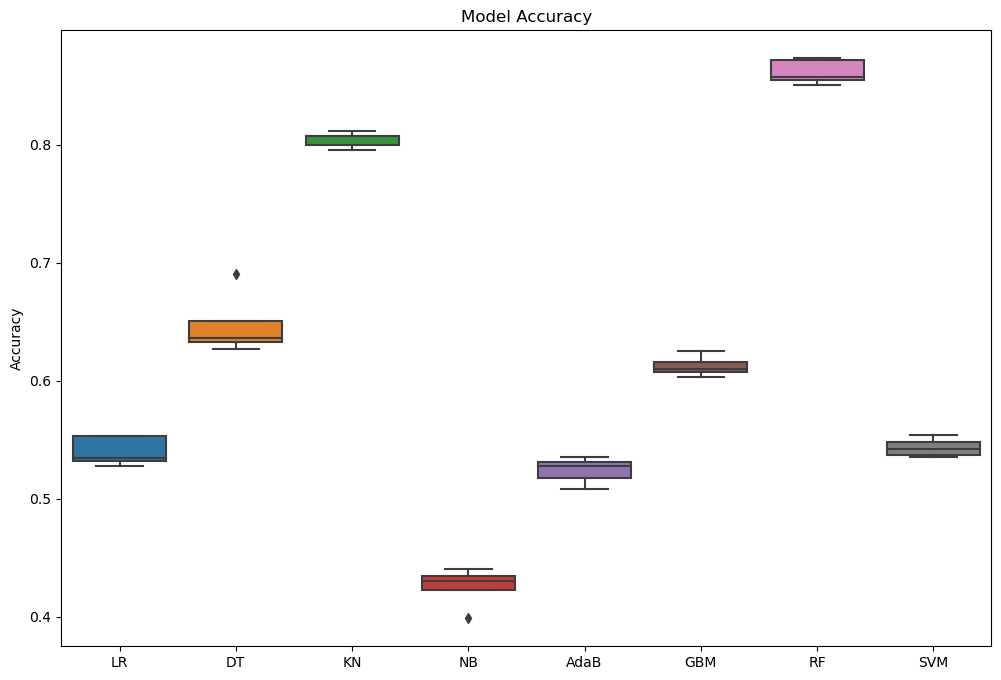

In [16]:
def plot_box(names, results):
    df_results = pd.DataFrame({names[i]: results[i] for i in range(len(names))})
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_results)
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.show()

plot_box(names, results)

### 9. Random Search for Hyperparameter Tuning (RandomForest)

In [52]:
from sklearn.model_selection import RandomizedSearchCV

def rf_random_search(X_train_scaled, y_train):
    rf = RandomForestClassifier(random_state=42)
    
    param_dist = {
        "n_estimators": [150,200,250,300],  
        "max_depth": [10,14,18],  
        "min_samples_split": [4,6],  
        "min_samples_leaf": [2,4,6],  
        "max_features": ["sqrt", "log2"]  
    }
    
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=15,
        cv=5,  
        scoring="accuracy",
        n_jobs=-1,  
        random_state=42
    )
    
    random_search.fit(X_train_scaled, y_train)
    
    results = pd.DataFrame(random_search.cv_results_)
    results = results.sort_values(by="mean_test_score", ascending=False).head(5)
    
    print("Best Parameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)
    print("\nTop 5 Configurations:")
    print(results[["params", "mean_test_score"]])
    
    return random_search.best_estimator_

best_rf_model = rf_random_search(X_train_scaled, y_train)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 18}
Best Score: 0.8631308810949528

Top 5 Configurations:
                                               params  mean_test_score
3   {'n_estimators': 200, 'min_samples_split': 4, ...         0.863131
14  {'n_estimators': 150, 'min_samples_split': 6, ...         0.849786
10  {'n_estimators': 300, 'min_samples_split': 4, ...         0.840890
11  {'n_estimators': 250, 'min_samples_split': 6, ...         0.838152
13  {'n_estimators': 200, 'min_samples_split': 6, ...         0.835244


The optimized Random Forest model achieved its best performance with 86.31% cross-validation accuracy. The selected hyperparameters improved generalization while maintaining a high training accuracy. The test accuracy is also significantly high, indicating that the model is performing well without severe overfitting. These results suggest that the current tuning effectively balances complexity and predictive power

### 10. Evaluating RF Model on Test Set

In [53]:
def evaluate_model_on_test_set(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model_on_test_set(best_rf_model, X_test_scaled, y_test)

Confusion Matrix:
[[548  50  26]
 [ 33 652  29]
 [ 19  46 546]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       624
         1.0       0.87      0.91      0.89       714
         2.0       0.91      0.89      0.90       611

    accuracy                           0.90      1949
   macro avg       0.90      0.89      0.90      1949
weighted avg       0.90      0.90      0.90      1949



In [54]:
train_acc = best_rf_model.score(X_train_scaled, y_train)
test_acc = best_rf_model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.8958


The model achieved 100% accuracy on the training set, indicating that it has completely memorized the training data. However, its test accuracy is 89.58%, which is still quite high. This suggests that while the model generalizes well, there might be some degree of overfitting.

### 11. RF Confusion Matrix Visualization

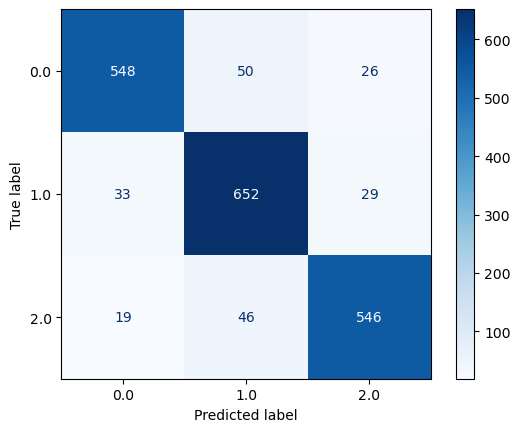

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_scaled, y_test, cmap='Blues')
plt.show()

Overall, the model shows good performance, with higher accuracy for class 1 and class 2 predictions. Misclassifications primarily occur between adjacent classes, suggesting some overlap or confusion in the features associated with these classes. However, these errors are relatively small in proportion to the total predictions, and the model performs well overall with 89.58% accuracy.

### 12. KNN Hyperparameter Tuning (Grid Search)

In [31]:
def knn_grid_search(X_train_scaled, y_train):
    knn = KNeighborsClassifier()
    param_grid = {
        "n_neighbors": [1, 3, 5, 7, 9, 11, 15],  
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski", "chebyshev"]  
    }
    
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring="accuracy")
    grid_search.fit(X_train_scaled, y_train)
    
    results = pd.DataFrame(grid_search.cv_results_)
    results = results.sort_values(by="mean_test_score", ascending=False).head(5)  
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("\nTop 5 Configurations:")
    print(results[["params", "mean_test_score"]])
    
    best_knn_model = grid_search.best_estimator_
    return best_knn_model

best_knn_model = knn_grid_search(X_train_scaled, y_train)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.9377517842506716

Top 5 Configurations:
                                               params  mean_test_score
14  {'metric': 'manhattan', 'n_neighbors': 1, 'wei...         0.937752
15  {'metric': 'manhattan', 'n_neighbors': 1, 'wei...         0.937752
0   {'metric': 'euclidean', 'n_neighbors': 1, 'wei...         0.913744
29  {'metric': 'minkowski', 'n_neighbors': 1, 'wei...         0.913744
1   {'metric': 'euclidean', 'n_neighbors': 1, 'wei...         0.913744


Overall, these results show that KNN performs very effectively on the dataset when tuned appropriately. The model's high accuracy of 93.78% suggests it's well-suited for this particular classification problem, especially with the chosen parameters.

### 13. Evaluating KNN Model on Test Set

In [32]:
def evaluate_model_on_test_set(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model_on_test_set(best_knn_model, X_test_scaled, y_test)

Confusion Matrix:
[[4719   42   31]
 [  49 5074   37]
 [  26   60 3944]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4792
         1.0       0.98      0.98      0.98      5160
         2.0       0.98      0.98      0.98      4030

    accuracy                           0.98     13982
   macro avg       0.98      0.98      0.98     13982
weighted avg       0.98      0.98      0.98     13982



In [33]:
train_acc = best_knn_model.score(X_train_scaled, y_train)
test_acc = best_knn_model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9825


### 14. KNN Confusion Matrix Visualization

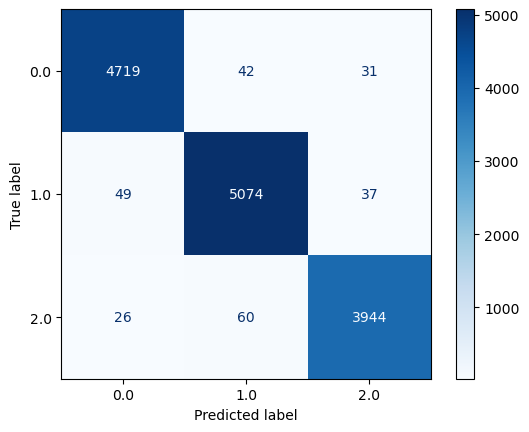

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test_scaled, y_test, cmap='Blues')
plt.show()

The K-Nearest Neighbors (KNN) model performed exceptionally well on the test set, achieving an impressive accuracy of 98%. The confusion matrix reveals that the model made very few misclassifications. For class 0, there were 4719 correct predictions with just 73 misclassifications. For class 1, 5074 correct predictions were made with 86 misclassifications, and for class 2, 3944 correct predictions were made with 86 misclassifications.

The classification report shows a perfect balance between precision, recall, and F1-score, all at 0.98 for each class. This indicates that the model is both highly accurate and reliable in identifying and classifying each class correctly. Overall, the KNN model with the best hyperparameters shows excellent performance, making it a strong choice for this classification task.

# Conclusion

In this project, we employed a range of machine learning models to classify EEG data, evaluating their performance using different algorithms and hyperparameter optimization techniques. Initially, we tested models including **Logistic Regression (LR), Decision Trees (DT), K-Nearest Neighbors (KNN), Gaussian Naive Bayes (NB), AdaBoost (AdaB), Gradient Boosting Machines (GBM), Random Forest (RF),** and **Support Vector Machines (SVM).**

Among the models tested, **Random Forest (RF)** demonstrated the highest baseline accuracy of **85.46%**. However, after applying hyperparameter optimization through RandomizedSearchCV, we improved the RF model's performance, achieving a test accuracy of **89.58%**, with a training accuracy of **100%**. This indicates the model was capable of generalizing well on the test set, although the slight difference between the train and test accuracy suggests there may be some **overfitting**, which is typical with complex models like Random Forest.

The K-Nearest Neighbors (KNN) model also showed excellent performance, particularly after hyperparameter tuning. The best configuration for KNN led to an accuracy of **98%** on the test set, with outstanding **precision**, **recall**, and **F1-scores** for each class. The confusion matrix confirmed that the KNN model made very few misclassifications, indicating it effectively distinguished between the different EEG classes.

While Random Forest provided robust results with high accuracy and performance, KNN **outperformed** it in terms of raw accuracy on the test set. Both models are strong **contenders**, and the decision on which to deploy would depend on the specific requirements of the task—whether accuracy, interpretability, or computational efficiency is prioritized.

In summary, this project demonstrates that machine learning models, particularly Random Forest and KNN, can effectively be applied to EEG classification tasks, providing reliable performance and valuable insights into neural data processing. Both models showcased significant potential, but **KNN emerged as the most accurate model for this specific dataset after optimization, offering excellent predictive power with minimal misclassifications**.